# Homework Assignment 7

#**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


## installing

In [1]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly_express

import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.18.5 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
jaxlib 0.3.7+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.8 requires numpy>=1.19, but you have num

  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=63e0b67ca8385f74fe27e0bd256f031feec5b1473125f4de09617fd0974cb42a
  Stored in directory: /tmp/pip-ephem-wheel-cache-y2cl9og2/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"danasror","key":"83f2d5cd8d8b7d0c9848067dc056909f"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


## Harry Poter network

In [ ]:
!kaggle datasets list -s "harry potter"

In [3]:
!mkdir ./datasets
!mkdir ./datasets/harry_potter_dataset

!kaggle datasets download zez000/characters-in-harry-potter-books -p ./datasets/harry_potter_dataset
!unzip ./datasets/harry_potter_dataset/*.zip  -d ./datasets/harry_potter_dataset/

mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 77.2MB/s]
Archive:  ./datasets/harry_potter_dataset/characters-in-harry-potter-books.zip
  inflating: ./datasets/harry_potter_dataset/HPCharactersData.csv  
  inflating: ./datasets/harry_potter_dataset/HPCharactersDataRaw.json  


In [4]:
!unzip ./datasets/harry_potter_dataset/characters-in-harry-potter-books.zip  -d ./datasets/harry_potter_dataset/

Archive:  ./datasets/harry_potter_dataset/characters-in-harry-potter-books.zip
replace ./datasets/harry_potter_dataset/HPCharactersData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/harry_potter_dataset/HPCharactersData.csv  
replace ./datasets/harry_potter_dataset/HPCharactersDataRaw.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/harry_potter_dataset/HPCharactersDataRaw.json  


In [5]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/harry_potter_dataset/HPCharactersData.csv")
sf

Finished parsing file /content/datasets/harry_potter_dataset/HPCharactersData.csv

Parsing completed. Parsed 100 lines in 0.048187 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/harry_potter_dataset/HPCharactersData.csv

Parsing completed. Parsed 1281 lines in 0.021517 secs.

Name,Link,Descr,Gender,Species/Race
Mrs. Abbott,https://www.hp-lexicon.org/character/abbott- ...,"Mrs. Abbott was themother of Hannah Abbott, ...",Female,witch
Hannah Abbott,https://www.hp-lexicon.org/character/abbott- ...,Hannah Abbott is aHufflepuff student in ...,Female,witch
Abel Treetops,https://www.hp-lexicon.org/character/abel- ...,Abel Treetops was awizard from Cincinnati ...,Male,wizard
Euan Abercrombie,https://www.hp-lexicon.org/character/abercrombie- ...,Euan Abercrombie was asmall boy with prominent ...,Male,wizard
Aberforth Dumbledore,https://www.hp-lexicon.org/character/dumbledore- ...,"Aberforth Dumbledore wasa tall, thin, grumpy- ...",Male,wizard
Abernathy,https://www.hp-lexicon.org/character/abernathy/ ...,Abernathy\xa0was TinaGoldstein’s pompous boss ...,Male,wizard
Abraham Peasegood,https://www.hp-lexicon.org/character/abraham- ...,Abraham Peasegood was anAmerican wizard who ...,Male,wizard
Abraham Potter,https://www.hp-lexicon.org/character/potter- ...,Abraham Potter was one ofMACUSA’s original twelve ...,Male,wizard
Abraxas Malfoy,https://www.hp-lexicon.org/character/malfoy- ...,Abraxas Malfoy was awizard who was believed ...,Male,wizard
Achilles Tolliver,https://www.hp-lexicon.org/character/achilles- ...,Achilles Tolliver was anAuror whom Tina Golds ...,Male,wizard


In [6]:
f_sf = sf[sf['School'] != 'Unknown']
f_sf

Name,Link,Descr,Gender,Species/Race
Hannah Abbott,https://www.hp-lexicon.org/character/abbott- ...,Hannah Abbott is aHufflepuff student in ...,Female,witch
Euan Abercrombie,https://www.hp-lexicon.org/character/abercrombie- ...,Euan Abercrombie was asmall boy with prominent ...,Male,wizard
Aberforth Dumbledore,https://www.hp-lexicon.org/character/dumbledore- ...,"Aberforth Dumbledore wasa tall, thin, grumpy- ...",Male,wizard
Stewart Ackerley,https://www.hp-lexicon.org/character/stewart- ...,Stewart Ackerley was aRavenclaw student who ...,Male,wizard
Adrian Pucey,https://www.hp-lexicon.org/character/adrian-pu ...,Adrian Pucey is a Chaseron the Slytherin ...,Male,wizard
Mad-Eye Moody,https://www.hp-lexicon.org/character/alastor-mad- ...,"Alastor “Mad-Eye” Moodyis a retired Auror, ...",Male,wizard
Albus Dumbledore,https://www.hp-lexicon.org/character/dumbledore- ...,Albus Dumbledore was theHeadmaster of Hogwarts ...,Male,wizard
Albus Potter,https://www.hp-lexicon.org/character/potter- ...,Albus Potter is themiddle child and second ...,Male,wizard
Alecto Carrow,https://www.hp-lexicon.org/character/carrow- ...,"Alecto and Amycus Carrow(JKR) were Death Eaters, ...",Female,witch
Alicia Spinnet,https://www.hp-lexicon.org/character/alicia- ...,Alicia Spinnet was aGryffindor girl two y ...,Female,witch


In [7]:
import networkx as nx

l_name = list(f_sf["Name"])
l_school = list(f_sf["School"])

g = nx.Graph()
edge_list = list(zip(l_name,l_school))

# remove all unknown places
for edge in edge_list:
  if  'own' in str(edge[1]) or str(edge[1]) == '':
    edge_list.remove(edge)

g.add_edges_from(edge_list)

print(nx.info(g))
nx.write_gml(g, "harry_potter.gml")

Graph with 278 nodes and 257 edges


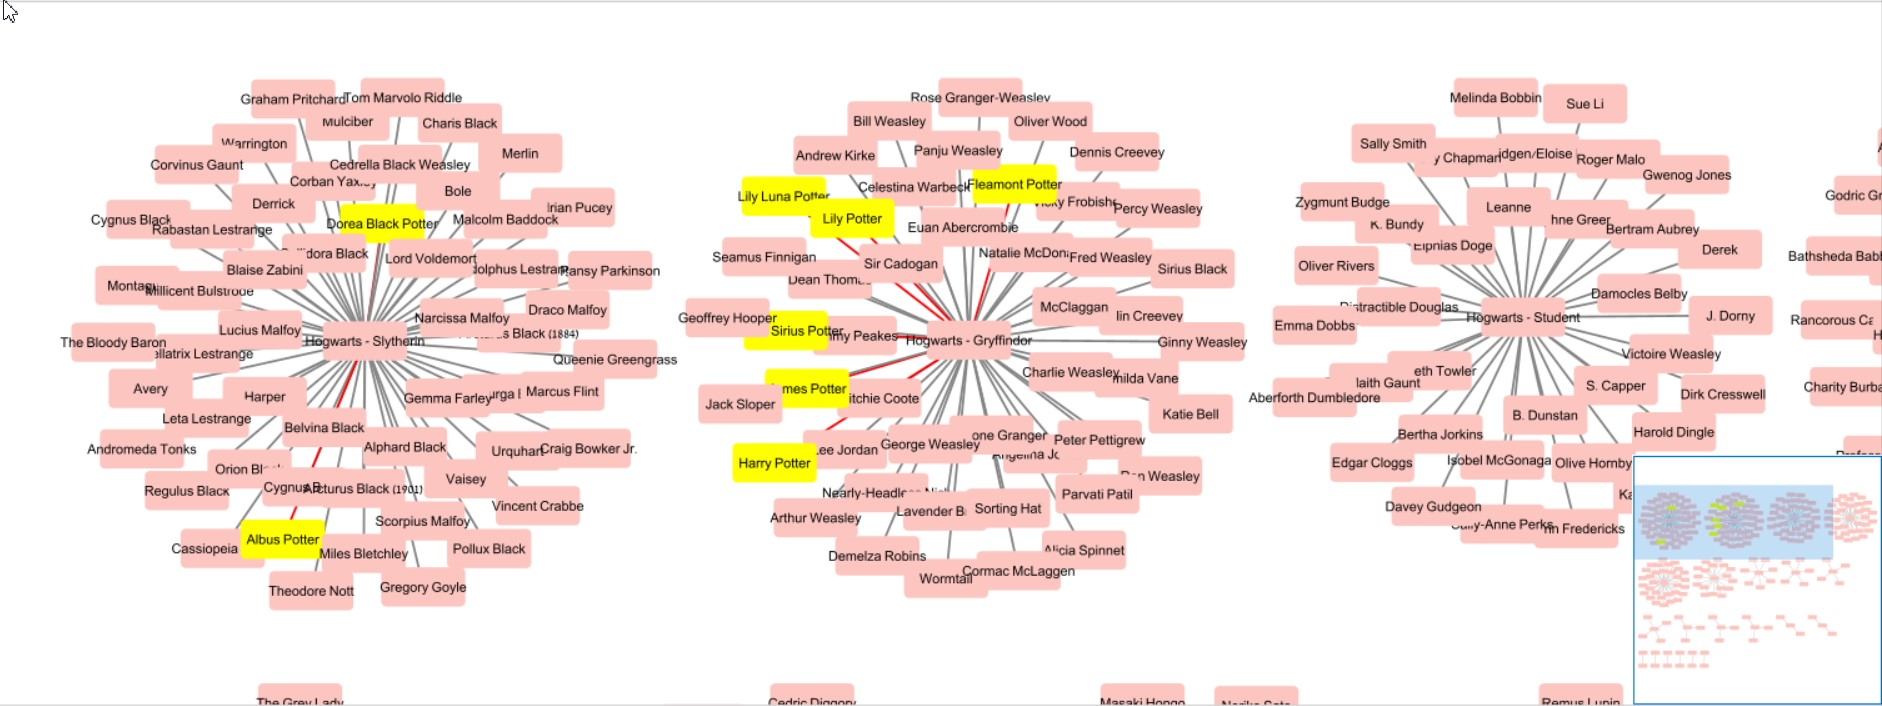

In [8]:
def unique(list1):
  
    # initialize a null list
    unique_list = []
      
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

unique(l_name)
#unique(l_school)

Hannah Abbott
Euan Abercrombie
Aberforth Dumbledore
Stewart Ackerley
Adrian Pucey
Mad-Eye Moody
Albus Dumbledore
Albus Potter
Alecto Carrow
Alicia Spinnet
Alphard Black
Amycus Carrow
Andrew Kirke
Andromeda Tonks
Angelina Johnson
Anthony Goldstein
Apollyon Pringle
Arcturus Black (1884)
Arcturus Black (1901)
Argus Filch
Armando Dippet
Artemisia Lufkin
Arthur Weasley
Bertram Aubrey
Aurora Sinistra
Avery
Babajide Akingbade
Millicent Bagnold
Barty Crouch Jr.
Bathsheda Babbling
Herbert Beery
Katie Bell
Benedita Dourado
Bertha Jorkins
Bill Weasley
Professor Binns
Bellatrix Lestrange
Belvina Black
Callidora Black
Cassiopeia Black
Charis Black
Cygnus Black
Cygnus Black (1889)
Orion Black
Pollux Black
Dorea Black Potter
Regulus Black
Sirius Black
Cedrella Black Weasley
Blaise Zabini
Miles Bletchley
The Bloody Baron
Melinda Bobbin
Bole
Susan Bones
Webster Boot
Libatius Borage
Craig Bowker Jr.
Bradley
Bridget Wenlock
Lavender Brown
Zygmunt Budge
K. Bundy
Charity Burbage
Cadwallader
S. Capper
Eddie

## Game Of Thrones network

In [9]:
!mkdir ./datasets
!mkdir ./datasets/game-of-thrones

!kaggle datasets download mylesoneill/game-of-thrones -p ./datasets/game-of-thrones
!unzip ./datasets/game-of-thrones/*.zip  -d ./datasets/game-of-thrones/

mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/66.1k [00:00<?, ?B/s]
100% 66.1k/66.1k [00:00<00:00, 46.8MB/s]
Archive:  ./datasets/game-of-thrones/game-of-thrones.zip
  inflating: ./datasets/game-of-thrones/battles.csv  
  inflating: ./datasets/game-of-thrones/character-deaths.csv  
  inflating: ./datasets/game-of-thrones/character-predictions.csv  


In [10]:
import pandas as pd

CSV_PATH = "/content/datasets/game-of-thrones/character-deaths.csv"
df = pd.read_csv(CSV_PATH)
df

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [11]:
f_df = df[df['Allegiances'] != 'None']
f_df

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Young Henly,Night's Watch,299.0,3.0,55.0,55.0,1,0,0,0,1,0,0
910,Ysilla,House Targaryen,NaN,NaN,NaN,8.0,1,0,0,0,0,0,1
911,Zei,Stark,NaN,NaN,NaN,64.0,0,0,0,0,1,0,0
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [12]:
unique(list(f_df['Name']))
unique(list(f_df['Allegiances']))

Addam Marbrand
Aegon Targaryen
Adrack Humble
Aemon Costayne
Aemon Estermont
Aemon Targaryen (son of Maekar I)
Aeron Greyjoy
Aethan
Aggar
Aggo
Alan of Rosby
Albar Royce
Albett
Alebelly
Alerie Hightower
Alesander Staedmon
Alester Florent
Alla Tyrell
Allard Seaworth
Alliser Thorne
Alyn
Alyn Ambrose
Alyn Estermont
Alyn Stackspear
Alys Karstark
Alysane Mormont
Ambrode
Amory Lorch
Andar Royce
Andrew Estermont
Andrey Dalt
Andrik
Antario Jast
Anya Waynwood
Archibald Yronwood
Ardrian Celtigar
Areo Hotah
Arianne Martell
Arneld
Arnolf Karstark
Aron Santagar
Arron
Arron Qorgyle
Arryk (Guard)
Arson
Arthor Karstark
Arwyn Oakheart
Arya Stark
Arys Oakheart
Asha Greyjoy
Aurane Waters
Axell Florent
Ballabar
Balon Swann
Bannen
Barbrey Dustin
Barristan Selmy
Barth (brewer)
Bass
Bayard Norcross
Bearded Ben
Becca
Bedwyck
Belwas
Benedar Belmore
Benfred Tallhart
Benjen Stark
Bessa (Winterfell)
Beth Cassel
Big Boil
Black Bernarr
Blane
Blue Bard
Bonifer Hasty
Borcas
Boremund Harlaw
Boros Blount
Borroq
Bowen Mar

In [13]:
import networkx as nx

l_name = list(f_df["Name"])
l_allegiances = list(f_df["Allegiances"])

g = nx.Graph()
edge_list = list(zip(l_name,l_school))

g.add_edges_from(edge_list)

print(nx.info(g))
nx.write_gml(g, "game-of-thrones.gml")

Graph with 278 nodes and 257 edges


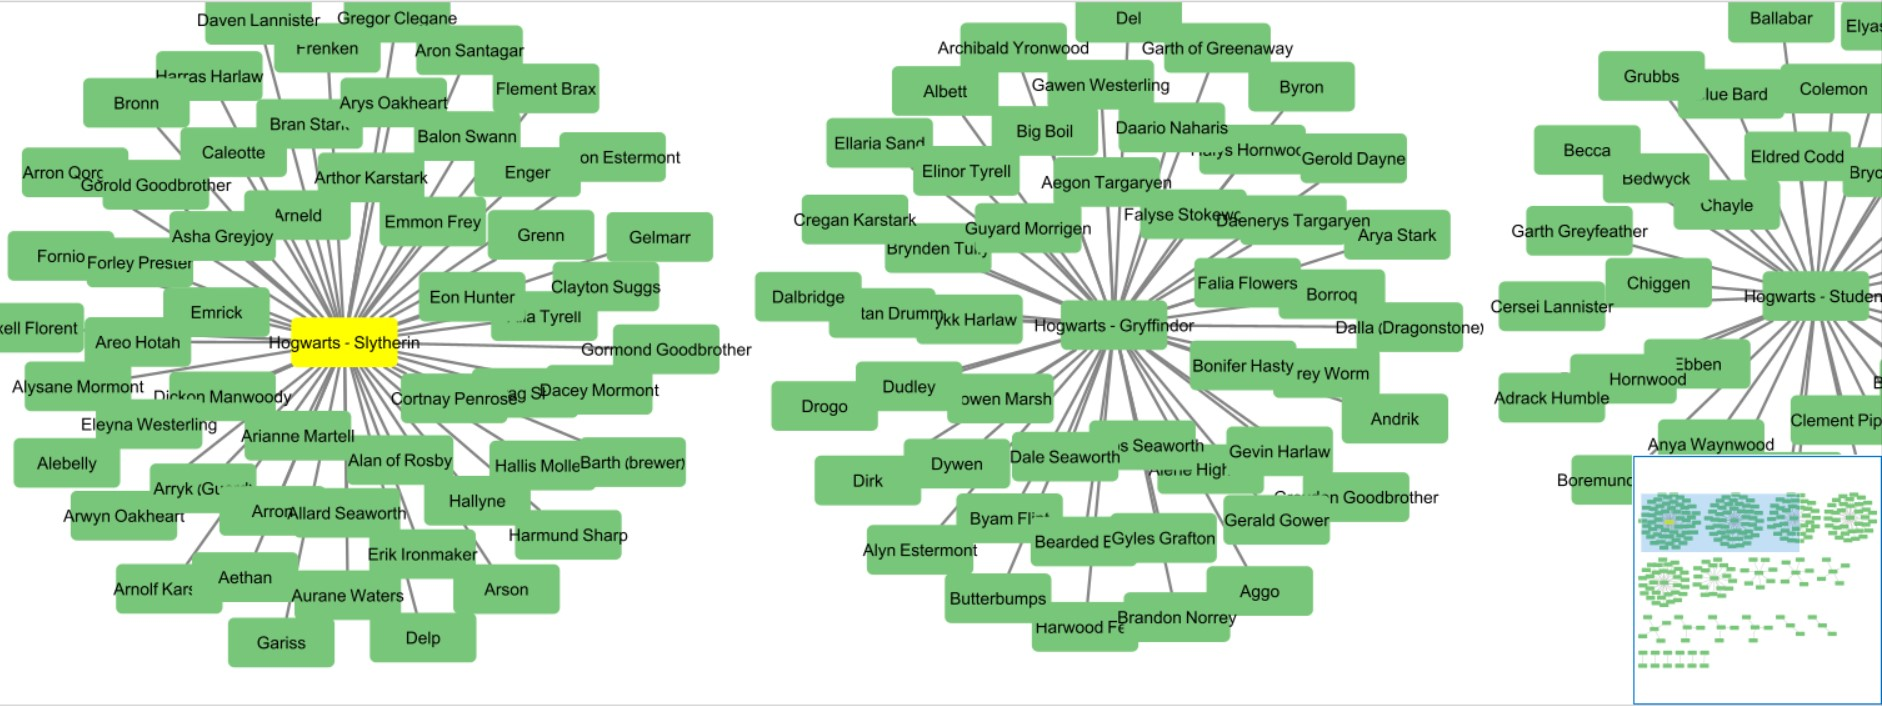

#**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [14]:
!mkdir ./datasets
!mkdir ./datasets/friends

!kaggle datasets download ryanstonebraker/friends-transcript -p ./datasets/friends
!unzip ./datasets/friends/*.zip  -d ./datasets/friends/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/friends’: File exists
  0% 0.00/1.72M [00:00<?, ?B/s]
100% 1.72M/1.72M [00:00<00:00, 130MB/s]
Archive:  ./datasets/friends/friends-transcript.zip
  inflating: ./datasets/friends/friends_quotes.csv  


In [2]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/friends/friends_quotes.csv")
sf

Finished parsing file /content/datasets/friends/friends_quotes.csv

Parsing completed. Parsed 100 lines in 0.25847 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,str,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/friends/friends_quotes.csv

Parsing completed. Parsed 60291 lines in 0.158405 secs.

author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


## Create and evaluate a classifier that given a line of text can predict who is the "friend" that said it (20pt).

In [17]:
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [3]:
from tqdm import tqdm
import spacy
nlp = spacy.load('en_core_web_lg')
vector_list = []
for quote in tqdm(sf['quote']):
    vector_list.append(nlp(quote).vector)
sf['vector'] = vector_list
sf

100%|██████████| 60291/60291 [11:16<00:00, 89.09it/s]


author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [4]:
train,test = sf.random_split(0.8)
cls = tc.classifier.create(train[:5000], features=["vector"], target="author")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 152

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 11.012940    | 0.270316          | 0.228571            | 2.722674          | 3.307861            |

| 2         | 21.057306    | 0.325895          | 0.220408            | 2.191235          | 3.221253            |

| 3         | 31.054655    | 0.418737          | 0.224490            | 1.845293          | 3.160848            |

| 4         | 40.924137    | 0.513474          | 0.220408            | 1.587198          | 3.119034            |

| 5         | 50.812837    | 0.590947          | 0.212245            | 1.399361          | 3.090143            |

| 7         | 70.532309    | 0.720842          | 0.220408            | 1.131136          | 3.060522            |

| 8         | 80.414227    | 0.781474          | 0.224490            | 1.022978          | 3.051920            |

| 9         | 90.139307    | 0.817474          | 0.228571            | 0.940604          | 3.047253            |

| 10        | 99.912160    | 0.846737          | 0.220408            | 0.865799          | 3.040470            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 152

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 7.891701     | 0.254737          | 0.228571            | 5.120563          | 7.145345            |

| 2         | 15.492313    | 0.294947          | 0.248980            | 4.321144          | 6.116415            |

| 3         | 23.454921    | 0.308211          | 0.253061            | 4.061600          | 5.828691            |

| 4         | 31.173910    | 0.326316          | 0.248980            | 3.837856          | 5.616495            |

| 5         | 39.080457    | 0.334316          | 0.253061            | 3.730954          | 5.480878            |

| 7         | 54.805141    | 0.349474          | 0.257143            | 3.600418          | 5.287663            |

| 8         | 62.754406    | 0.346737          | 0.253061            | 3.565646          | 5.243298            |

| 9         | 70.458950    | 0.349263          | 0.240816            | 3.535947          | 5.283169            |

| 10        | 78.390020    | 0.348211          | 0.240816            | 3.520970          | 5.237657            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 152

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 11.016735    | 0.270316          | 0.228571            | 5.322412          | 7.361452            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 152

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 45451

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.945122     | 0.196211          | 0.204000            |

| 1         | 4        | 1.000000  | 2.329877     | 0.178316          | 0.176000            |

| 2         | 9        | 0.571681  | 5.091739     | 0.205895          | 0.216000            |

| 3         | 16       | 7.533886  | 8.699022     | 0.230737          | 0.224000            |

| 4         | 17       | 7.533886  | 9.639731     | 0.118526          | 0.088000            |

| 9         | 28       | 1.000000  | 16.996998    | 0.294526          | 0.244000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.216
PROGRESS: RandomForestClassifier          : 0.236
PROGRESS: DecisionTreeClassifier          : 0.224
PROGRESS: LogisticClassifier              : 0.244
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [5]:
cls.evaluate(test[:1000])

{'accuracy': 0.237, 'auc': nan, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 175
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    Sandy     |       Ross      |   1   |
 |     Susa     |       Susa      |   4   |
 |    David     |       Ross      |   6   |
 | Dr. Mitchell |       Ross      |   1   |
 | Aunt Lillian |      Monica     |   1   |
 |    Lowell    |      Rachel     |   1   |
 |     Kid      |      Rachel     |   1   |
 |    Monica    |       Ross      |   38  |
 | Mr. Heckles  |       Ross      |   2   |
 |    Aurora    |      Rachel     |   1   |
 +--------------+-----------------+-------+
 [175 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.1682451209348838, 'log_loss': 2.775096887192557, 'precision': 0.639570487634778

##  Using sentiment analysis identify who are the most and less friendly friends (20pt). 

In [6]:
from afinn import Afinn
afinn = Afinn()

sf['score'] = sf['quote'].apply(lambda t: afinn.score(t))
sf

author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [7]:
friendly_dict = {}

for friend in sf:
  f_name = friend["author"]
  score = friendly_dict.setdefault(f_name, 0)
  friendly_dict.update({f_name: score + friend["score"]})


print(friendly_dict)

{'Monica': 3469.0, 'Joey': 3927.0, 'Chandler': 3261.0, 'Phoebe': 3593.0, 'All': 153.0, 'Ross': 3950.0, 'Rachel': 4640.0, 'Waitress': 0.0, 'Phoebe, Ross, Chandler, and Joey': 0.0, 'Paul': 71.0, 'Priest on TV': 1.0, 'Frannie': -3.0, 'Ross and Rachel': 3.0, 'Customer': -6.0, 'Marsha': 1.0, 'Carol': 104.0, 'Chandler and Joey': 6.0, 'Mrs. Geller': 75.0, 'Mr. Geller': 56.0, 'Susan': 53.0, 'Barry': 36.0, 'Robbie': 0.0, 'Bernice': -4.0, 'Dr. Oberman': 1.0, 'Paula': -4.0, 'Alan': 7.0, 'The Guys': 4.0, 'Lizzie': 0.0, 'Guys': -3.0, 'Leslie': 19.0, 'Kiki': 0.0, 'Joanne': 0.0, 'Receptionist': 7.0, 'Pizza Guy': 0.0, 'Monica and Phoebe': 3.0, 'Both': 2.0, 'Kid': -2.0, 'Angela': 8.0, 'Janice': 130.0, 'Woman': 78.0, 'Bob': -5.0, "All you want is a dingle,\r\n What you envy's a schwang,\r\n A thing through which you can tinkle,\r\n Or play with, or simply let hang..": 0.0, 'Aurora': 4.0, 'Director': 22.0, 'Jill': 57.0, 'Monica, Joey, and Phoebe': 4.0, 'Mr. Heckles': 0.0, 'Paolo': 2.0, 'Shelley': 18.0, '

In [8]:
import operator
sorted_dict = sorted(friendly_dict.items(), key=operator.itemgetter(1), reverse=True)

print('the friendliest friend: ', sorted_dict[0])

the friendliest friend:  ('Rachel', 4640.0)


## Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [9]:
sf["episode_number"] = sf["episode_number"].apply(lambda en: int(en))

train,test = sf.random_split(0.8)
cls = tc.classifier.create(train[:5000], features=["vector"], target="episode_number")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.130862     | 0.444421          | 0.108000            | 2.641358          | 3.029080            |

| 2         | 6.202745     | 0.581474          | 0.120000            | 2.304199          | 3.006948            |

| 3         | 9.280642     | 0.699368          | 0.148000            | 2.007881          | 2.998993            |

| 4         | 12.363974    | 0.772421          | 0.132000            | 1.771766          | 2.987911            |

| 5         | 15.418735    | 0.827789          | 0.152000            | 1.559347          | 2.970809            |

| 7         | 21.585492    | 0.897263          | 0.140000            | 1.228644          | 2.964793            |

| 8         | 24.656316    | 0.918316          | 0.144000            | 1.086499          | 2.959409            |

| 9         | 27.685765    | 0.929474          | 0.152000            | 0.985422          | 2.968651            |

| 10        | 30.735139    | 0.937474          | 0.164000            | 0.885822          | 2.975430            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.325223     | 0.385474          | 0.132000            | 2.275641          | 3.435434            |

| 2         | 4.637780     | 0.496000          | 0.124000            | 2.016618          | 3.156123            |

| 3         | 6.946537     | 0.563158          | 0.120000            | 1.953634          | 3.073766            |

| 4         | 9.269972     | 0.615368          | 0.128000            | 1.919811          | 3.008257            |

| 5         | 11.634673    | 0.657895          | 0.156000            | 1.894104          | 2.980879            |

| 10        | 23.190422    | 0.754316          | 0.156000            | 1.856830          | 2.951224            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.089463     | 0.444421          | 0.108000            | 2.077192          | 3.421232            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4750

Number of classes           : 24

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 6923

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.220623     | 0.100842          | 0.100000            |

| 1         | 5        | 5.000000  | 0.595442     | 0.158105          | 0.136000            |

| 2         | 6        | 5.000000  | 0.784540     | 0.104000          | 0.108000            |

| 3         | 10       | 1.646578  | 1.240009     | 0.184000          | 0.164000            |

| 4         | 11       | 1.646578  | 1.434571     | 0.157684          | 0.128000            |

| 9         | 18       | 1.000000  | 2.576327     | 0.248842          | 0.172000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.164
PROGRESS: RandomForestClassifier          : 0.156
PROGRESS: DecisionTreeClassifier          : 0.108
PROGRESS: LogisticClassifier              : 0.172
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [10]:
cls.evaluate(test[:2000])

{'accuracy': 0.1185, 'auc': 0.6106595999059291, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 462
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      23      |        13       |   1   |
 |      21      |        5        |   4   |
 |      21      |        19       |   3   |
 |      22      |        4        |   2   |
 |      17      |        23       |   2   |
 |      12      |        7        |   2   |
 |      20      |        15       |   1   |
 |      21      |        1        |   17  |
 |      16      |        15       |   1   |
 |      7       |        3        |   2   |
 +--------------+-----------------+-------+
 [462 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.11096314602191247, 'log_loss': 3.836582192639134, 'precision': 

In [11]:
def predict_episode(quote):
  sf2 = tc.SFrame()
  sf2['quote'] = [quote]
  pred = cls.classify(sf2)
  return pred['class'][0], pred['probability'][0]

In [12]:
episode, prob = predict_episode('Hello Joey!')
print(f"Quote belongs to episode: {episode} in probability of: {prob}")

episode, prob = predict_episode('Sounds like a date to me.')
print(f"Quote belongs to episode: {episode} in probability of: {prob}")

Quote belongs to episode: 1 in probability of: 0.1468751682065882
Quote belongs to episode: 1 in probability of: 0.1468751682065882
